In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline#magic function


In [22]:
df=pd.read_csv(r'Dataset.csv', encoding='windows-1252')
df=df.dropna()

In [14]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,44.000000,44.000000,44.000000,44.000000,44.000000
mean,40.788013,17.880845,12.335350,4.178440,705.768727
std,6.471698,4.682552,1.452395,0.956938,158.999688
min,30.872000,10.632000,10.155000,2.167000,342.324670
25%,34.644509,13.581450,11.011000,3.454750,563.861697
50%,41.781730,17.801500,12.202500,4.110000,686.580000
75%,45.588250,22.152250,13.356250,4.997500,845.691250
max,53.012000,24.903000,14.967000,5.933000,968.247000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 43
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 44 non-null     object 
 1   Address               44 non-null     object 
 2   Avatar                44 non-null     object 
 3   Avg. Session Length   44 non-null     float64
 4   Time on App           44 non-null     float64
 5   Time on Website       44 non-null     float64
 6   Length of Membership  44 non-null     float64
 7   Yearly Amount Spent   44 non-null     float64
dtypes: float64(5), object(3)
memory usage: 3.1+ KB


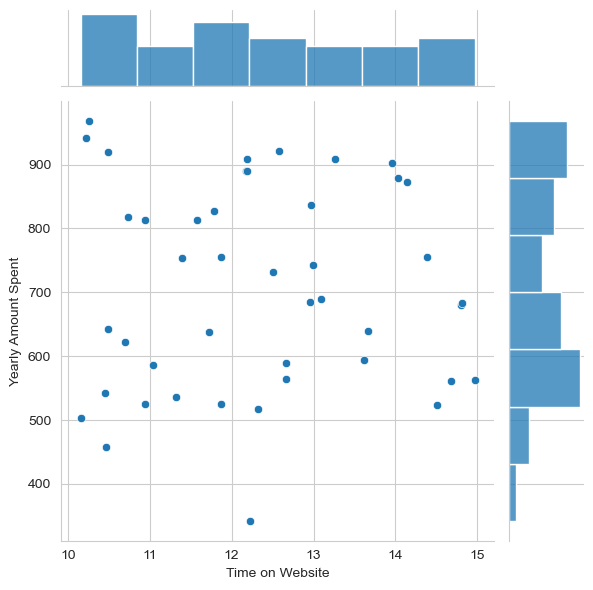

In [24]:
sns.set_style('whitegrid')
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=df)

** Do the same but with the Time on App column instead. **

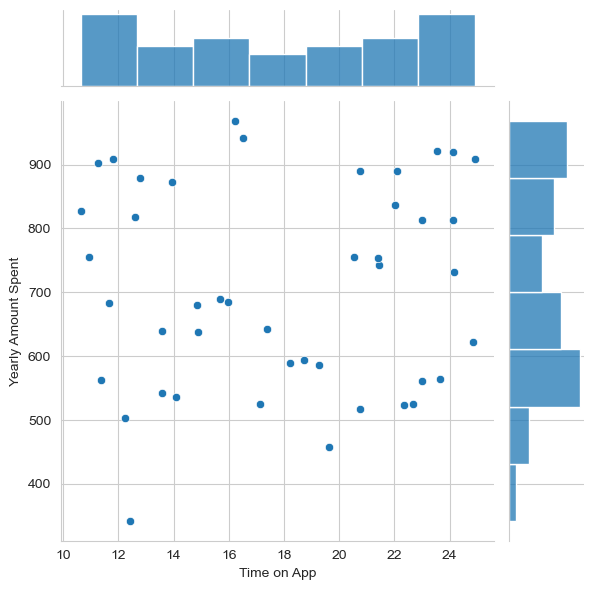

In [25]:
sns.set_style('whitegrid')
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=df)

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

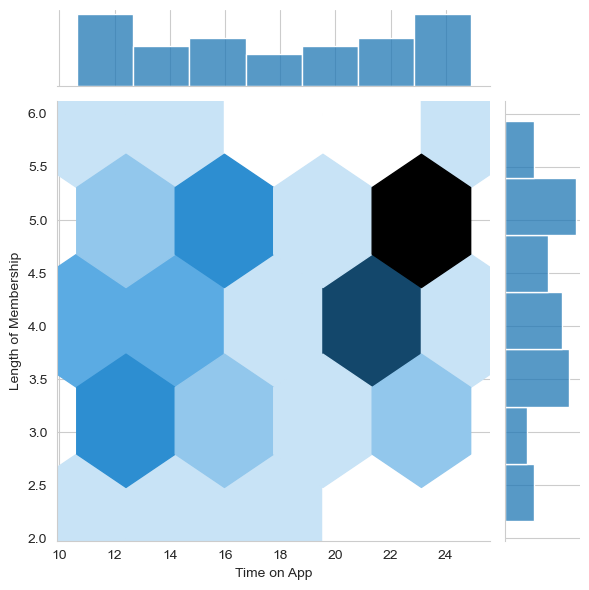

In [26]:
sns.set_style('whitegrid')
sns.jointplot(x='Time on App',y='Length of Membership',data=df,kind='hex')

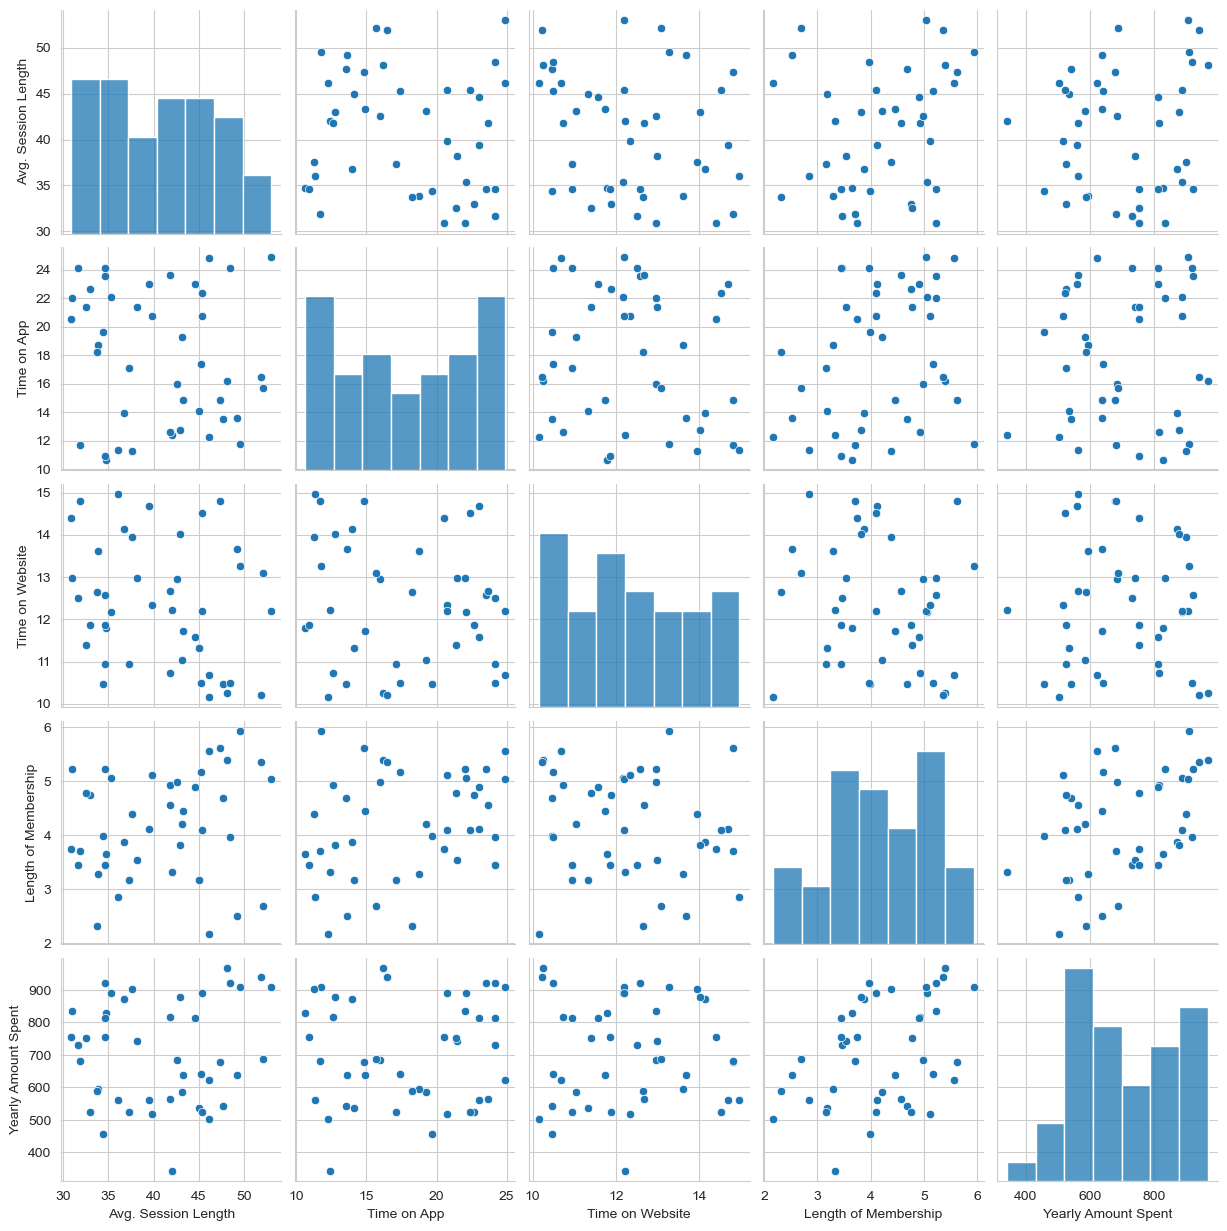

In [27]:
sns.pairplot(df)

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

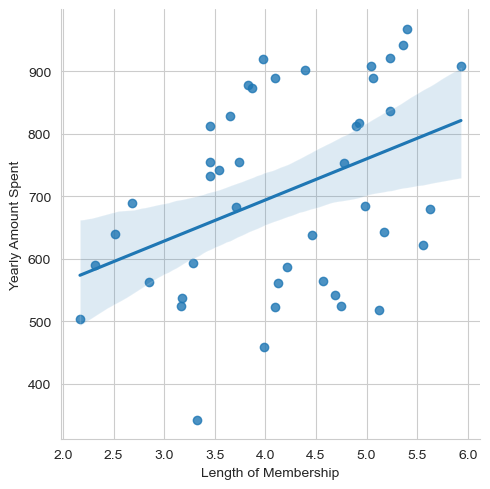

In [28]:
sns.set_style('whitegrid')
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df)

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [29]:
X=df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
X

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.656345,23.53500,12.57475,5.232357
1,34.366530,19.64624,10.46420,3.986877
2,41.798460,23.64587,12.66463,4.568790
3,42.000100,12.42328,12.22000,3.324000
4,47.655154,13.56480,10.45684,4.684320
5,45.238000,17.38200,10.49200,5.172000
6,36.784000,13.95600,14.13700,3.869000
7,32.946000,22.67300,11.87500,4.752000
8,49.512000,11.78900,13.26800,5.933000
9,31.679000,24.15500,12.50600,3.456000


In [30]:
y=df['Yearly Amount Spent']
y

0     921.436570
1     457.984651
2     564.347930
3     342.324670
4     541.855158
5     642.789000
6     873.124000
7     524.458000
8     908.673000
9     731.910000
10    586.332000
11    679.541000
12    742.678000
13    817.392000
14    593.836000
15    968.247000
16    561.723000
17    827.918000
18    684.245000
19    755.312000
20    621.499000
21    902.178000
22    536.650000
23    889.567000
24    812.487000
25    682.927000
26    908.156000
27    524.689000
28    639.721000
29    753.185000
30    878.432000
31    589.773000
32    941.326000
33    523.019000
34    754.596000
35    688.915000
36    517.372000
37    920.078000
38    562.403000
39    638.249000
40    836.547000
41    503.874000
42    889.567000
43    812.487000
Name: Yearly Amount Spent, dtype: float64

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [32]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [33]:
lm=LinearRegression()

** Train/fit lm on the training data.**

In [35]:
lm.fit(X,y)

LinearRegression()

**Print out the coefficients of the model**

In [36]:
print(lm.coef_)

[ 0.54571578 -1.03605204  6.44931928 67.88002282]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [40]:
predicts=lm.predict(X_test)
predicts

array([653.34118973, 728.96789876, 699.309455  , 735.54898197,
       637.60158713, 563.95675176, 681.23772845, 617.81588101,
       657.18381503, 712.16201496, 637.51881558, 779.74144187,
       757.46955803, 670.71572302])

** Create a scatterplot of the real test values versus the predicted values. **

Text(0, 0.5, 'Predicted Values')

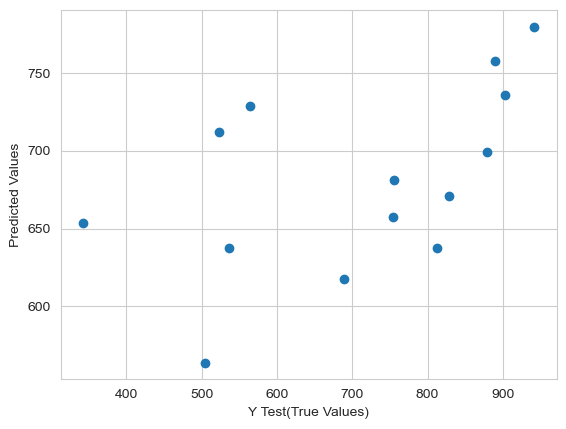

In [41]:
plt.scatter(y_test,predicts)
plt.xlabel('Y Test(True Values)')
plt.ylabel('Predicted Values')

## Evaluating the Model



In [42]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predicts))
print('MSE:', metrics.mean_squared_error(y_test, predicts))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicts)))

MAE: 145.7145315980772
MSE: 25155.307628690174
RMSE: 158.60424845725342
